# Clasificador de estrategias
## k-Medoids

In [7]:
import numpy as np
import pandas as pd
import matplotlib as plt
from math import sqrt
from yellowbrick.cluster import KElbowVisualizer
from statistics import stdev
import datetime as dt

In [19]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd

#import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA 

# k medoids
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster.elbow import elbow
from pyclustering.cluster import cluster_visualizer

In [20]:
# parameters
n = (2520) # number of observation to choose

In [21]:
# Load the data
path = '/Archivos/MIDS/GitHub/models/PI_2/Features.csv'
#Archivos/MIDS/GitHub/models/PI_2/Features.csv
Features = pd.read_csv('Rentabilidad de estrategias base 100.csv', index_col=0)

In [22]:
Features.head(5)

,LA1,SA1,LSA1,LA101,SA101,LSA101,LA2,SA2,LSA2,LA3,...,LSA53,LA54,SA54,LSA54,LA6,SA6,LSA6,LAMAR,SAMAR,LSAMAR
Date,,,,,,,,,,,,,,,,,,,,,
2008-10-31,112.315749,101.786622,114.102371,114.322571,103.793443,118.116014,99.449679,88.920552,88.370231,104.354609,...,81.883986,96.206557,85.677429,81.883986,104.354609,93.825481,98.180090,96.206557,85.677429,81.883986
2008-11-03,108.673546,102.316747,110.996498,106.226580,100.349511,105.832219,100.307494,93.034200,93.220667,103.600199,...,90.399733,99.398751,91.744855,90.399733,103.600199,96.678447,100.455694,99.398751,91.744855,90.399733
2008-11-04,125.214699,88.014545,112.375738,127.844695,91.470217,118.005653,112.245048,76.940813,88.189179,119.390981,...,80.001433,108.193919,73.073908,80.001433,119.390981,83.184769,101.746311,108.193919,73.073908,80.001433
2008-11-05,99.808765,100.439696,105.439075,98.080355,101.646659,103.660622,96.722894,92.773882,94.141451,99.195744,...,89.726586,96.156896,90.086712,89.726586,99.195744,97.735318,102.333012,96.156896,90.086712,89.726586
2008-11-06,80.598195,117.785421,103.353926,75.685445,115.555927,94.176416,81.308015,111.866757,98.512300,79.377214,...,97.935928,82.998843,110.656415,97.935928,79.377214,113.898740,98.811468,82.998843,110.656415,97.935928


In [23]:
df = Features.tail(2520)

In [13]:
# calculamos el retorno y volatilidad.

returns = df.pct_change().mean()
returns = pd.DataFrame(returns)
returns.columns = ['Returns'] 
returns['Volatility'] = df.pct_change().std()

#format the data as a numpy array to feed into the kmedoids algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
data

array([[ 0.00187538,  0.03380039],
       [-0.00137904,  0.03812399],
       [ 0.00049633,  0.0187305 ],
       [ 0.00201356,  0.0354735 ],
       [-0.00126166,  0.0366834 ],
       [ 0.0007519 ,  0.01908987],
       [ 0.00147875,  0.03629711],
       [-0.00179648,  0.03555102],
       [-0.00031773,  0.01786201],
       [ 0.0015662 ,  0.0365361 ],
       [-0.00170903,  0.03531205],
       [-0.00014283,  0.01788842],
       [ 0.00156968,  0.03574369],
       [-0.00170555,  0.03611822],
       [-0.00013587,  0.01790574],
       [ 0.0014959 ,  0.03611611],
       [-0.00177933,  0.03596058],
       [-0.00028342,  0.01874603],
       [ 0.00149113,  0.03656556],
       [-0.0017841 ,  0.03548397],
       [-0.00029297,  0.01867204],
       [ 0.0013766 ,  0.03630006],
       [-0.00189863,  0.0355938 ],
       [-0.00052203,  0.01804347],
       [ 0.00172749,  0.03541604],
       [-0.00154774,  0.0372119 ],
       [ 0.00017975,  0.02084185]])

In [15]:
kmin, kmax = 1, 10
elbow_instance = elbow(data, kmin, kmax)

In [16]:
elbow_instance.process()
amount_clusters = elbow_instance.get_amount()  # most probable amount of clusters
wce = elbow_instance.get_wce()  # total within-cluster errors for each K

In [17]:
amount_clusters

4

[[4, 1, 13, 25], [8, 2, 5, 11, 14, 17, 20, 23, 26], [10, 7, 16, 19, 22], [15, 0, 3, 6, 9, 12, 18, 21, 24]]


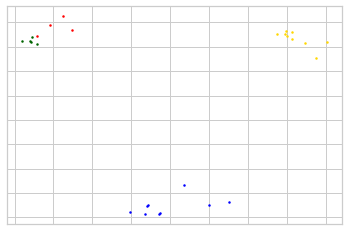

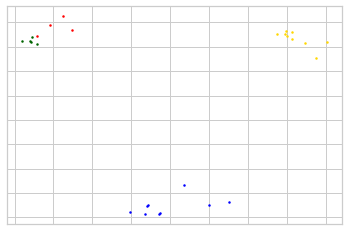

In [32]:
initial_medoids = [4, 8, 10, 15]
# Create instance of K-Medoids algorithm.
kmedoids_instance = kmedoids(data, initial_medoids)
# Run cluster analysis and obtain results.
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
# Show allocated clusters.
print(clusters)
# Display clusters.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, data)
visualizer.show()

In [ ]:
def CH_index(X, labels, centroids):
    mean = np.mean(X,axis=0) 
    B = np.sum([ np.sum(labels==i)*(c - mean)**2 for i,c in enumerate(centroids)])
    W = np.sum([ (X-centroids[labels[i]])**2 for i, X in enumerate(X)])
    c = len(centroids)
    n = len(X)
    return ((n-c)*B )/1.0/((c-1)*W)

In [ ]:
# Calculate silhouette_score
print('\n Silhouette_score PI_STD:')
print(silhouette_score(X, kmeans1.labels_))

CH_index_std=CH_index(X, kmeans1.labels_, kmeans1.cluster_centers_)
print('\n CH_index_std:',CH_index_std)

In [ ]:
data=pd.DataFrame({'Returns': data[:, 0], 'Volatility': data[:, 1]})
data['ClusterkMeans'] = labels1
data

In [ ]:
sharpeclusters =[] 
Features = Features.tail(n)
for i in range(data['ClusterkMeans'].nunique()):
    
    l = data.loc[data['ClusterkMeans'] == i].index.values.astype(int).tolist()
    dfexp=Features.pct_change().iloc[: , l].sum(axis = 1, skipna = True)
    r = dfexp.mean()
    s = stdev(dfexp)
    
    sharpeclusters.append(r/s)
sharpeclusters = np.asanyarray(sharpeclusters)

In [ ]:
selection = sharpeclusters.argmax()


In [ ]:
cond = data['ClusterkMeans'] == selection

data['selection'] = np.where(cond, 1, 0)


In [ ]:
data

In [ ]:
sharpeclusters
